In [1]:
import numpy as nump  # to to mathematical calculations
import pandas as panda  # for data manipulation
import seaborn as sb    # for 3D visualization
import lightgbm as ligbm 
import matplotlib.pyplot as mplot
from sklearn.model_selection import cross_val_score,train_test_split  
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score,mean_squared_error,mean_absolute_error # for calculating accuracy errors
from sklearn.neighbors import KNeighborsRegressor 

In [2]:
df=panda.read_csv("car_price (1).csv") #IMporting Dataset

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


# Data Preprocessing

In [5]:
df.Seats.replace(to_replace=0, value=df.Seats.median(), inplace=True)   # replacing values having 0 with the median of the column

In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)  # removing the column 

In [7]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [8]:
df.select_dtypes(exclude=nump.number).nunique()

Name            1876
Location          11
Fuel_Type          5
Transmission       2
Owner_Type         4
Mileage          442
Engine           146
Power            372
New_Price        540
dtype: int64

In [9]:
df.drop("Name",axis=1,inplace=True)

In [10]:
(df.isnull().sum() / len(df)) * 100

Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

In [11]:
df.drop("New_Price",axis=1,inplace=True) #DRopping NewPrice coloumn due to NUll VaLue

In [12]:
for i in ["Mileage","Engine","Power"]:
    df[i].replace({nump.nan:"nan nan"},inplace=True)

In [13]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [14]:
for i in ["Mileage","Engine","Power"]:
    df[i] = df[i].apply(lambda x:x.split()[0])

In [15]:
for i in ["Mileage","Engine","Power"]:
    df[i].replace({"nan":"0"},inplace=True)
    df[i].replace({"null":"0"},inplace=True)

In [16]:
for i in ["Mileage","Engine","Power"]:
    df[i] = df[i].astype("float")

In [17]:
for i in ["Mileage","Engine","Power"]:
    df[i].replace({0:nump.nan},inplace=True)

In [18]:
df.isnull().sum() / len(df)*100

Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              1.162984
Engine               0.598106
Power                2.375810
Seats                0.697790
Price                0.000000
dtype: float64

In [19]:
for i in ["Mileage","Engine","Power","Seats"]:
    df[i].fillna(df[i].median(),inplace=True) # filling the null values with the median of the column

In [20]:
(df.isnull().sum() / len(df)) * 100

Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Power                0.0
Seats                0.0
Price                0.0
dtype: float64

In [21]:
df.groupby("Seats")["Price"].mean().sort_values(ascending=False) ##GROUPBY is used and COlumn is sorted in descending order 

Seats
2.0     55.211875
4.0     20.752525
7.0     14.837463
6.0      9.511290
5.0      8.461438
8.0      7.458881
9.0      4.450000
10.0     4.280000
Name: Price, dtype: float64

In [22]:
df.groupby("Seats")["Price"].median()

Seats
2.0     54.500
4.0      6.300
5.0      5.200
6.0      6.500
7.0     10.750
8.0      6.295
9.0      4.500
10.0     3.650
Name: Price, dtype: float64

In [23]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


# LabelEncoder

In [24]:
from sklearn.preprocessing import LabelEncoder  # for converting object type variables to numerical type variables
lbb_e = LabelEncoder()
df['Fuel_Type'] = lbb_e.fit_transform(df['Fuel_Type'])
df['Transmission'] = lbb_e.fit_transform(df['Transmission'])

print(df)


        Location  Year  Kilometers_Driven  Fuel_Type  Transmission Owner_Type  \
0         Mumbai  2010              72000          0             1      First   
1           Pune  2015              41000          1             1      First   
2        Chennai  2011              46000          4             1      First   
3        Chennai  2012              87000          1             1      First   
4     Coimbatore  2013              40670          1             0     Second   
...          ...   ...                ...        ...           ...        ...   
6014       Delhi  2014              27365          1             1      First   
6015      Jaipur  2015             100000          1             1      First   
6016      Jaipur  2012              55000          1             1     Second   
6017     Kolkata  2013              46000          4             1      First   
6018   Hyderabad  2011              47000          1             1      First   

      Mileage  Engine   Pow

In [25]:
df.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [26]:
for i in df.index:
    if df.loc[i,"Owner_Type"] == "First": #providing index to FIRST
        df.loc[i,"Owner_Type"] = 1       #Provided Index is 1
    if df.loc[i,"Owner_Type"] == "Second": ##providing index to SECOND
        df.loc[i,"Owner_Type"] = 2       #Provided Index is 2
    if df.loc[i,"Owner_Type"] == "Third": #providing index to THIRD
        df.loc[i,"Owner_Type"] = 3      #Provided Index is 3
    if df.loc[i,"Owner_Type"] == "Fourth & Above": #providing index to FOURTH
        df.loc[i,"Owner_Type"] = 4       #Provided Index is 4

In [27]:
df.Owner_Type = df.Owner_Type.astype("int64")

In [28]:
df.Location = df.Location.map(df.groupby("Location")["Price"].median())

In [29]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,5.750,2010,72000,0,1,1,26.60,998.0,58.16,5.0,1.75
1,4.250,2015,41000,1,1,1,19.67,1582.0,126.20,5.0,12.50
2,4.500,2011,46000,4,1,1,18.20,1199.0,88.70,5.0,4.50
3,4.500,2012,87000,1,1,1,20.77,1248.0,88.76,7.0,6.00
4,8.305,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


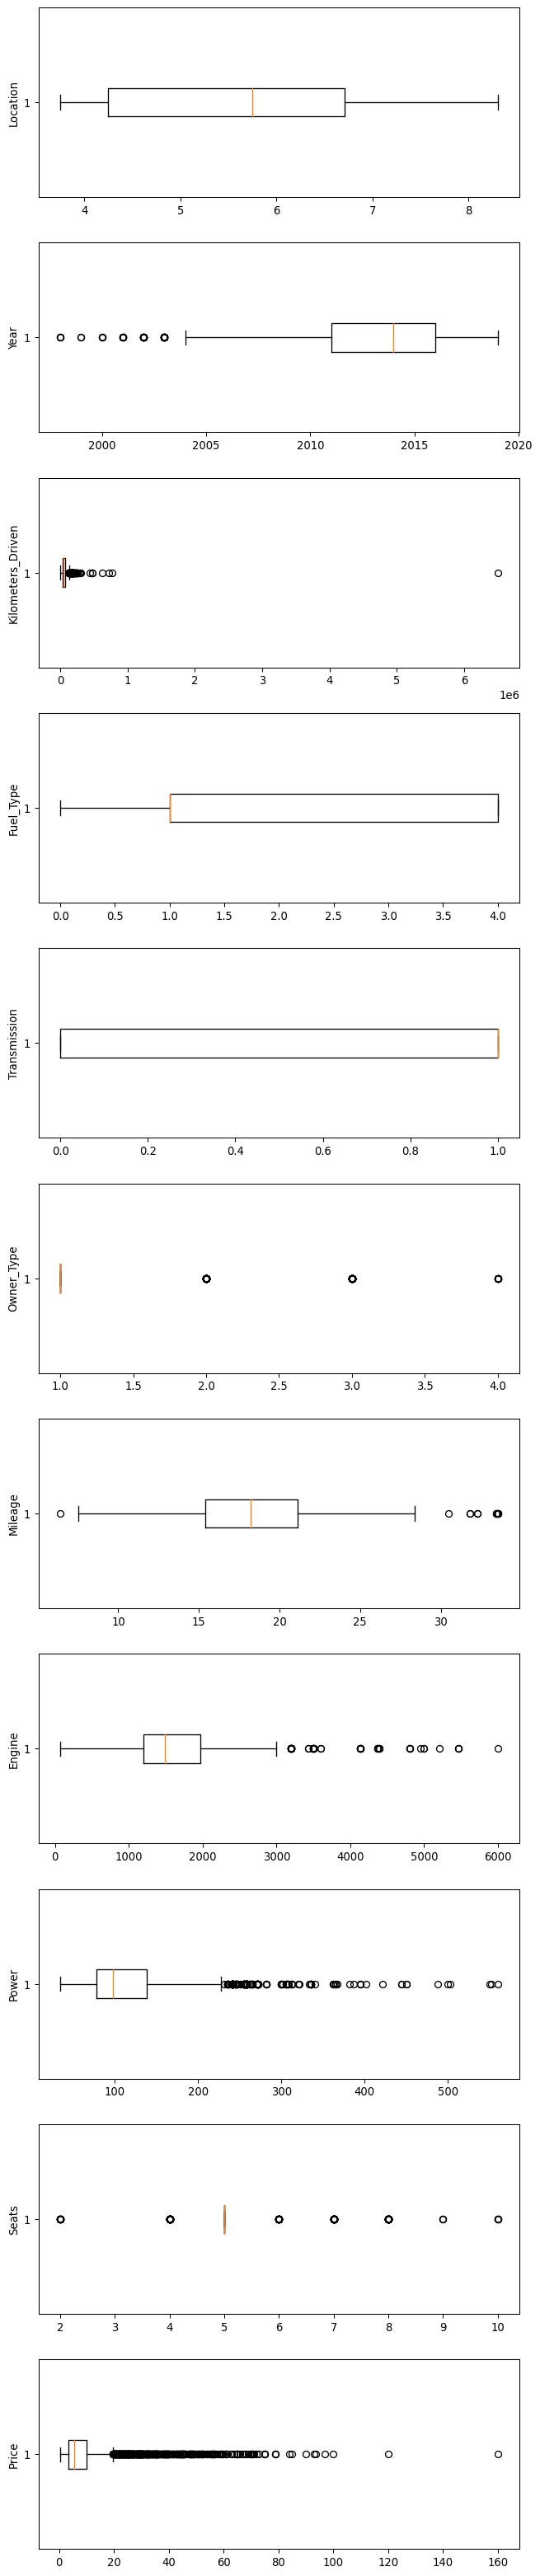

In [30]:
# Box Plots
num_cols = df.shape[1]
fig, axs = mplot.subplots(num_cols, 1, dpi=95, figsize=(7, 3*num_cols))
for loop, col in enumerate(df.columns):          # iterating every colmn of data
    axs[loop].boxplot(df[col], vert=False)  #BOXplot
    axs[loop].set_ylabel(col)          #for the ouTliers

mplot.tight_layout()  # To ensure proper spacing between subplots
mplot.show()

In [31]:

quo1, quo3 = nump.percentile(df['Year'], [25, 75]) # Identifying the lower and upper quartile
inter_qr = quo3 - quo1
L_boun = quo1 - (1.5 * inter_qr)    # caculating bounds
U_boun = quo3 + (1.5 * inter_qr)     # caculating bounds
df = df[(df['Year'] >= L_boun)      # dropping outliers
                & (df['Year'] <= U_boun)]

In [32]:
quo1, quo3 = nump.percentile(df['Engine'], [25, 75])  # Identifying the lower and upper quartile
inter_qr = quo3 - quo1
L_boun = quo1 - (1.5 * inter_qr)  # caculating bounds
U_boun = quo3 + (1.5 * inter_qr)  # caculating bounds
df = df[(df['Engine'] >= L_boun)   # dropping outliers
                & (df['Engine'] <= U_boun)]

In [33]:
quo1, quo3 = nump.percentile(df['Power'], [25, 75])  # Identifying the lower and upper quartile
inter_qr = quo3 - quo1 
L_boun = quo1 - (1.5 * inter_qr)  # caculating bounds
U_boun = quo3 + (1.5 * inter_qr) # caculating bounds
df = df[(df['Power'] >= L_boun)  # dropping outliers
                & (df['Power'] <= U_boun)]

In [34]:
quo1, quo3 = nump.percentile(df['Seats'], [25, 75]) # Identifying the lower and upper quartile
inter_qr = quo3 - quo1
L_boun = quo1 - (1.5 * inter_qr) # caculating bounds
U_boun = quo3 + (1.5 * inter_qr)  # caculating bounds
df = df[(df['Seats'] >= L_boun)   # dropping outliers
                & (df['Seats'] <= U_boun)]

In [35]:

quo1, quo3 = nump.percentile(df['Price'], [25, 75]) # Identifying the lower and upper quartile

inter_qr = quo3 - quo1
L_boun = quo1 - (1.5 * inter_qr)  # caculating bounds
U_boun = quo3 + (1.5 * inter_qr)  # caculating bounds
df = df[(df['Price'] >= L_boun)  # dropping outliers
                & (df['Price'] <= U_boun)]

In [36]:
X = df.drop("Price",axis=1)   # creating INdependent variable containing all attribbutes except the price
y = df.Price             # creating dependent variable containing the attribute price

# Training =75% and Testing=25% using Random Forest

In [37]:
X_t, X_tst, y_t, y_tst = train_test_split(X, y, test_size=0.25, random_state=42) ##Importing TrainTestSplit From SKL.MODELSELECTION FOR 25 prcent testing data

In [38]:

r_reg = RandomForestRegressor(n_estimators=100, random_state=42)
 
r_reg.fit(X_t, y_t)   # using fit to train

# Make predictions On The test Data
y_pre = r_reg.predict(X_tst)


In [39]:
# Evaluate the model
M_S_E=mean_squared_error(y_tst,y_pre)  #calcUlating MEAN SUARRED ERROR
rM_S_E = nump.sqrt(mean_squared_error(y_tst,y_pre)) #calcUlating ROOT MEAN SUARRED ERROR
M_A_E=mean_absolute_error(y_tst,y_pre)  ##calcUlating MEAN ABSOLUTE ERROR
r2 = r2_score(y_tst, y_pre) #calculating R2SCORe
print("M_S_E  OF TEST DATA USING RANDOM FOREST",M_S_E) 
print("RM_S_E  OF TEST DATA USING RANDOM FOREST",rM_S_E)
print("M_A_E OF TEST DATA USING RANDOM FOREST",M_A_E)
print("R2-SCORE OF TEST DATA USING RANDOM FOREST:", r2)

M_S_E  OF TEST DATA USING RANDOM FOREST 1.169398665132205
RM_S_E  OF TEST DATA USING RANDOM FOREST 1.0813873797729494
M_A_E OF TEST DATA USING RANDOM FOREST 0.6926525077447335
R2-SCORE OF TEST DATA USING RANDOM FOREST: 0.8671108683443405


#  Training =80% and Testing=20% using Random Forest

In [40]:
X_t, X_tst, y_t, y_tst = train_test_split(X, y, test_size=0.20, random_state=42) ##Importing TrainTestSplit From SKL.MODELSELECTION FOR 20 prcent testing data

In [41]:
# Create the Random Forest regressor
r_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
r_reg.fit(X_t, y_t)

# Make predictions on the test data
y_pre = r_reg.predict(X_tst)


In [42]:
# Evaluate the model
M_S_E=mean_squared_error(y_tst,y_pre)   #calcUlating MEAN SUARRED ERROR
rM_S_E = nump.sqrt(mean_squared_error(y_tst,y_pre))#calcUlating ROOT MEAN SUARRED ERROR
M_A_E=mean_absolute_error(y_tst,y_pre) ##calcUlating MEAN ABSOLUTE ERROR
r2 = r2_score(y_tst, y_pre) #calculating R2SCORe
print("M_S_E OF TEST DATA USING RANDOM FOREST",rM_S_E)
print("RM_S_E OF TEST DATA USING RANDOM FOREST",rM_S_E)
print("M_A_E OF TEST DATA USING RANDOM FOREST",M_A_E)
print("R2-SCORE OF TEST DATA USING RANDOM FOREST", r2)

M_S_E OF TEST DATA USING RANDOM FOREST 1.0661767161294604
RM_S_E OF TEST DATA USING RANDOM FOREST 1.0661767161294604
M_A_E OF TEST DATA USING RANDOM FOREST 0.6859726001511715
R2-SCORE OF TEST DATA USING RANDOM FOREST 0.872780632254947


#  Training =85% and Testing=15% using Random Forest

In [43]:
X_t, X_tst, y_t, y_tst = train_test_split(X, y, test_size=0.15, random_state=42) ##Importing TrainTestSplit From SKL.MODELSELECTION FOR 15 prcent testing data

# for n-estimators=90

In [44]:
# Create the Random Forest regressor
Rf_Reg = RandomForestRegressor(n_estimators=90, random_state=42)

# Train the model on the training data
Rf_Reg.fit(X_t, y_t)

# Make predictions on the test data
y_pre = Rf_Reg.predict(X_tst)


In [45]:
 #evaluate
M_S_E=mean_squared_error(y_tst,y_pre)   #calcUlating MEAN SUARRED ERROR
rM_S_E = nump.sqrt(mean_squared_error(y_tst,y_pre))  #calcUlating ROOT MEAN SUARRED ERROR
M_A_E=mean_absolute_error(y_tst,y_pre)    ##calcUlating MEAN ABSOLUTE ERROR
r2 = r2_score(y_tst, y_pre)            #calculating R2SCORe
print("M_S_E OF TEST DATA FOR N_ESTIMATORS=90, USING RANDOM FOREST",M_S_E)
print("RM_S_E OF TEST DATA FOR N_ESTIMATORS=90, USING RANDOM FOREST",rM_S_E)
print("M_A_E OF TEST DATA FOR N_ESTIMATORS=90, USING RANDOM FOREST",M_A_E)
print("R2-SCORE OF TEST DATA FOR N_ESTIMATORS=90, USING RANDOM FOREST", r2)

M_S_E OF TEST DATA FOR N_ESTIMATORS=90, USING RANDOM FOREST 1.1794091729446972
RM_S_E OF TEST DATA FOR N_ESTIMATORS=90, USING RANDOM FOREST 1.0860060648747305
M_A_E OF TEST DATA FOR N_ESTIMATORS=90, USING RANDOM FOREST 0.6890450308778482
R2-SCORE OF TEST DATA FOR N_ESTIMATORS=90, USING RANDOM FOREST 0.8677358723851435


# for n-estimators =100

In [46]:
# Create the Random Forest regressor
Rf_Reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
Rf_Reg.fit(X_t, y_t)

# Make predictions on the test data
y_pre = Rf_Reg.predict(X_tst)

In [47]:
# Evaluate the model for n_estimators=100
M_S_E=mean_squared_error(y_tst,y_pre) #calcUlating MEAN SUARRED ERROR
rM_S_E = nump.sqrt(mean_squared_error(y_tst,y_pre)) #calcUlating ROOT MEAN SUARRED ERROR
M_A_E=mean_absolute_error(y_tst,y_pre)  ##calcUlating MEAN ABSOLUTE ERROR
r2 = r2_score(y_tst, y_pre)   #calculating R2SCORe
print("M_S_E OF TEST DATA FOR N_ESTIMATORS=100, USING RANDOM FOREST",M_S_E)
print("RM_S_E OF TEST DATA FOR N_ESTIMATORS=100, USING RANDOM FOREST",rM_S_E)
print("M_A_E OF TEST DATA FOR N_ESTIMATORS=100, USING RANDOM FOREST",M_A_E)
print("R2-SCORE OF TEST FOR N_ESTIMATORS=100, DATA USING RANDOM FOREST", r2)

M_S_E OF TEST DATA FOR N_ESTIMATORS=100, USING RANDOM FOREST 1.1830042392453741
RM_S_E OF TEST DATA FOR N_ESTIMATORS=100, USING RANDOM FOREST 1.087659983287688
M_A_E OF TEST DATA FOR N_ESTIMATORS=100, USING RANDOM FOREST 0.689232573713696
R2-SCORE OF TEST FOR N_ESTIMATORS=100, DATA USING RANDOM FOREST 0.8673327058515228


# for n-estimators=110

In [48]:
# Create the Random Forest regressor
Rf_Reg = RandomForestRegressor(n_estimators=110, random_state=42)

# Train the model on the training data
Rf_Reg.fit(X_t, y_t)

# Make predictions on the test data
y_pre =Rf_Reg.predict(X_tst)

In [49]:
# Evaluate the model for n_estimators=110
M_S_E=mean_squared_error(y_tst,y_pre)  #calcUlating MEAN SUARRED ERROR
rM_S_E = nump.sqrt(mean_squared_error(y_tst,y_pre))#calcUlating ROOT MEAN SUARRED ERROR
M_A_E=mean_absolute_error(y_tst,y_pre)  ##calcUlating MEAN ABSOLUTE ERROR
r2 = r2_score(y_tst, y_pre)   #calculating R2SCORe
print("M_S_E OF TEST DATA FOR N_ESTIMATORS=110, USING RANDOM FOREST",M_S_E)
print("RM_S_E OF TEST DATA FOR N_ESTIMATORS=110, USING RANDOM FOREST",rM_S_E)
print("M_A_E OF TEST DATA FOR N_ESTIMATORS=110, USING RANDOM FOREST",M_A_E)
print("R2-SCORE OF TEST FOR N_ESTIMATORS=110, DATA USING RANDOM FOREST", r2)

M_S_E OF TEST DATA FOR N_ESTIMATORS=110, USING RANDOM FOREST 1.18507413464996
RM_S_E OF TEST DATA FOR N_ESTIMATORS=110, USING RANDOM FOREST 1.0886111034937866
M_A_E OF TEST DATA FOR N_ESTIMATORS=110, USING RANDOM FOREST 0.689151926943026
R2-SCORE OF TEST FOR N_ESTIMATORS=110, DATA USING RANDOM FOREST 0.8671005786846143


#  Training =75% and Testing=25% using lgbm

In [50]:
# Step 1: Split data into training and testing sets
X_t, X_tst, y_t, y_tst = train_test_split(X, y, test_size=0.25, random_state=42) ##Importing TrainTestSplit From SKL.MODELSELECTION FOR 25 prcent testing data

# Step 2: Create and train the ligbmMRegressor model
Lb_Reg = ligbm.LGBMRegressor(force_row_wise=True)  # Set force_row_wise=True to remove the warning
Lb_Reg.fit(X_t, y_t)

# Step 3: Make predictions on the testing data
y_pre = Lb_Reg.predict(X_tst)

[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 3227, number of used features: 9
[LightGBM] [Info] Start training from score 5.199551


In [51]:
# Evaluate the model
M_S_E=mean_squared_error(y_tst,y_pre)   #calcUlating MEAN SUARRED ERROR
rM_S_E = nump.sqrt(mean_squared_error(y_tst,y_pre)) #calcUlating ROOT MEAN SUARRED ERROR
M_A_E=mean_absolute_error(y_tst,y_pre)  ##calcUlating MEAN ABSOLUTE ERROR
r2 = r2_score(y_tst, y_pre)  #calculating R2SCORe
print("M_S_E OF TEST DATA USING ligbm",M_S_E)
print("RM_S_E OF TEST DATA USING ligbm",rM_S_E)
print("M_A_E OF TEST DATA USING ligbm",M_A_E)
print("R2-SCORE OF TEST DATA USING ligbm", r2)


M_S_E OF TEST DATA USING ligbm 0.9616469024571181
RM_S_E OF TEST DATA USING ligbm 0.9806359683680372
M_A_E OF TEST DATA USING ligbm 0.6420736066428658
R2-SCORE OF TEST DATA USING ligbm 0.8907195419002519


#   Training =80% and Testing=20% using lgbm

In [52]:
# Step 1: Split data into training and testing sets
X_t, X_tst, y_t, y_tst = train_test_split(X, y, test_size=0.20, random_state=42) ##Importing TrainTestSplit From SKL.MODELSELECTION FOR 20 prcent testing data

# Step 2: Create and train the ligbmMRegressor model
# Set force_row_wise=True to remove the warning
ligbm_regressor = ligbm.LGBMRegressor(force_row_wise=True)
ligbm_regressor.fit(X_t, y_t)

# Step 3: Make predictions on the testing data
y_pre = ligbm_regressor.predict(X_tst)


[LightGBM] [Info] Total Bins 763
[LightGBM] [Info] Number of data points in the train set: 3442, number of used features: 9
[LightGBM] [Info] Start training from score 5.198550


In [53]:
# Evaluate the model
M_S_E=mean_squared_error(y_tst,y_pre)  #calcUlating MEAN SUARRED ERROR
rM_S_E = nump.sqrt(mean_squared_error(y_tst,y_pre)) #calcUlating ROOT MEAN SUARRED ERROR
M_A_E=mean_absolute_error(y_tst,y_pre)  ##calcUlating MEAN ABSOLUTE ERROR
r2 = r2_score(y_tst, y_pre)  #calculating R2SCORe
print("M_S_E OF TEST DATA USING lgbm",M_S_E)
print("RM_S_E OF TEST DATA USING lgbm",rM_S_E)
print("M_A_E OF TEST DATA USING RANDOM lgbm",M_A_E)
print("R2-SCORE OF TEST DATA USING lgbm", r2)

M_S_E OF TEST DATA USING ligbm 0.9717493389222678
RM_S_E OF TEST DATA USING ligbm 0.9857734724176076
M_A_E OF TEST DATA USING RANDOM ligbm 0.6466856570452988
R2-SCORE OF TEST DATA USING ligbm 0.8912450334941435


#  Training =85% and Testing=15% using lgbm

In [54]:
# Step 1: Split data into training and testing sets
X_t, X_tst, y_t, y_tst = train_test_split(X, y, test_size=0.15, random_state=42)  ##Importing TrainTestSplit From SKL.MODELSELECTION FOR 15 prcent testing data

# Step 2: Create and train the ligbmMRegressor model
# Set force_row_wise=True to remove the warning
ligbm_regressor = ligbm.LGBMRegressor() 
ligbm_regressor.fit(X_t, y_t)

# Step 3: Make predictions on the testing data
y_pre = ligbm_regressor.predict(X_tst)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 3657, number of used features: 9
[LightGBM] [Info] Start training from score 5.203251


In [55]:
# Evaluate the model
M_S_E=mean_squared_error(y_tst,y_pre)  #calcUlating MEAN SUARRED ERROR
rM_S_E = nump.sqrt(mean_squared_error(y_tst,y_pre)) #calcUlating ROOT MEAN SUARRED ERROR
M_A_E=mean_absolute_error(y_tst,y_pre)  ##calcUlating MEAN ABSOLUTE ERROR
r2 = r2_score(y_tst, y_pre)   #calculating R2SCORe
print("M_S_E OF TEST DATA USING ligbm",M_S_E)
print("RM_S_E OF TEST DATA USING ligbm",rM_S_E)
print("M_A_E OF TEST DATA USING ligbm",M_A_E)
print("R2-SCORE OF TEST DATA USING ligbm", r2)

M_S_E OF TEST DATA USING ligbm 1.0027819382655123
RM_S_E OF TEST DATA USING ligbm 1.001390003078477
M_A_E OF TEST DATA USING ligbm 0.6527965020658273
R2-SCORE OF TEST DATA USING ligbm 0.8875436266775228


# TRAINING DATA

# 1) USING RANDOM FOREST

In [56]:
X_t, X_tst, y_t, y_tst = train_test_split(X, y, test_size=0.25, random_state=42) ##Importing TrainTestSplit From SKL.MODELSELECTION FOR 25 prcent testing data
r_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
r_reg.fit(X_t, y_t)

# Make predictions on the test data
y_pre_t = r_reg.predict(X_t)

In [57]:
# Evaluate the model
M_S_E=mean_squared_error(y_t,y_pre_t)
rM_S_E = nump.sqrt(mean_squared_error(y_t,y_pre_t))#calcUlating ROOT MEAN SUARRED ERROR
M_A_E=mean_absolute_error(y_t,y_pre_t)  ##calcUlating MEAN ABSOLUTE ERROR
r2 = r2_score(y_t, y_pre_t)     #calculating R2SCORe
print("M_S_E OF TRAIN DATA USING ligbm",M_S_E)
print("RM_S_E OF TRAIN DATA USING ligbm",rM_S_E)
print("M_A_E OF TRAIN DATA USING ligbm",M_A_E)
print("R2-SCORE OF TRAIN DATA USING ligbm", r2)

M_S_E OF TRAIN DATA USING ligbm 0.16206718211419943
RM_S_E OF TRAIN DATA USING ligbm 0.40257568495153734
M_A_E OF TRAIN DATA USING ligbm 0.2595597089291247
R2-SCORE OF TRAIN DATA USING ligbm 0.9804288233385972


In [58]:
X_t, X_tst, y_t, y_tst = train_test_split(X, y, test_size=0.20, random_state=42) ##Importing TrainTestSplit From SKL.MODELSELECTION FOR 20 prcent testing data

# Make predictions on the test data
y_pre_t = r_reg.predict(X_t)

In [59]:
M_S_E=mean_squared_error(y_t,y_pre_t)  #calcUlating MEAN SUARRED ERROR
rM_S_E = nump.sqrt(mean_squared_error(y_t,y_pre_t))#calcUlating ROOT MEAN SUARRED ERROR
M_A_E=mean_absolute_error(y_t,y_pre_t) ##calcUlating MEAN ABSOLUTE ERROR
r2 = r2_score(y_t, y_pre_t)   #calculating R2SCORe
print("M_S_E OF TRAIN DATA USING ligbm",M_S_E)
print("RM_S_E OF TRAIN DATA USING ligbm",rM_S_E)
print("M_A_E OF TRAIN DATA USING ligbm",M_A_E)
print("R2-SCORE OF TRAIN DATA USING ligbm", r2)

M_S_E OF TRAIN DATA USING ligbm 0.22668702777660252
RM_S_E OF TRAIN DATA USING ligbm 0.47611661153188356
M_A_E OF TRAIN DATA USING ligbm 0.2863795770039566
R2-SCORE OF TRAIN DATA USING ligbm 0.9726204204270692


In [60]:
X_t, X_tst, y_t, y_tst = train_test_split(X, y, test_size=0.15, random_state=42) ##Importing TrainTestSplit From SKL.MODELSELECTION FOR 15 prcent testing data

# Make predictions on the test data
y_pre_t = r_reg.predict(X_t)

In [61]:
print("M_S_E OF TRAIN DATA USING ligbm",M_S_E)
print("RM_S_E OF TRAIN DATA USING ligbm",rM_S_E)
print("M_A_E OF TRAIN DATA USING ligbm",M_A_E)
print("R2-SCORE OF TRAIN DATA USING ligbm", r2)

M_S_E OF TRAIN DATA USING ligbm 0.22668702777660252
RM_S_E OF TRAIN DATA USING ligbm 0.47611661153188356
M_A_E OF TRAIN DATA USING ligbm 0.2863795770039566
R2-SCORE OF TRAIN DATA USING ligbm 0.9726204204270692


# 2)lgbm

In [ ]:
# Step 1: Split data into training and testing sets
X_t, X_tst, y_t, y_tst = train_test_split(X, y, test_size=0.25, random_state=42)  ##Importing TrainTestSplit From SKL.MODELSELECTION FOR 25 prcent testing data

# Step 2: Create and train the ligbmMRegressor model
ligbm_regressor = ligbm.LGBMRegressor(force_row_wise=True)  # Set force_row_wise=True to remove the warning
ligbm_regressor.fit(X_t, y_t)

# Step 3: Make predictions on the testing data
y_pre_t = ligbm_regressor.predict(X_t)

In [63]:
M_S_E=mean_squared_error(y_t,y_pre_t)  #calcUlating MEAN SUARRED ERROR
rM_S_E = nump.sqrt(mean_squared_error(y_t,y_pre_t))#calcUlating ROOT MEAN SUARRED ERROR
M_A_E=mean_absolute_error(y_t,y_pre_t) ##calcUlating MEAN ABSOLUTE ERROR
r2 = r2_score(y_t, y_pre_t)    #calculating R2SCORe
print("M_S_E OF TRAIN DATA USING ligbm",M_S_E)
print("RM_S_E OF TRAIN DATA USING ligbm",rM_S_E)
print("M_A_E OF TRAIN DATA USING ligbm",M_A_E)
print("R2-SCORE OF TRAIN DATA USING ligbm", r2)

M_S_E OF TRAIN DATA USING ligbm 0.44306920878056544
RM_S_E OF TRAIN DATA USING ligbm 0.6656344408010793
M_A_E OF TRAIN DATA USING ligbm 0.46441004696390087
R2-SCORE OF TRAIN DATA USING ligbm 0.9464951161292965


In [64]:
X_t, X_tst, y_t, y_tst = train_test_split(X, y, test_size=0.20, random_state=42) ##Importing TrainTestSplit From SKL.MODELSELECTION FOR 20 prcent testing data

# Step 3: Make predictions on the testing data
y_pre_t = ligbm_regressor.predict(X_t)

In [65]:
M_S_E=mean_squared_error(y_t,y_pre_t)   #calcUlating MEAN SUARRED ERROR
rM_S_E = nump.sqrt(mean_squared_error(y_t,y_pre_t))#calcUlating ROOT MEAN SUARRED ERROR
M_A_E=mean_absolute_error(y_t,y_pre_t) ##calcUlating MEAN ABSOLUTE ERROR
r2 = r2_score(y_t, y_pre_t)   #calculating R2SCORe
print("M_S_E OF TRAIN DATA USING ligbm",M_S_E)
print("RM_S_E OF TRAIN DATA USING ligbm",rM_S_E)
print("M_A_E OF TRAIN DATA USING ligbm",M_A_E)
print("R2-SCORE OF TRAIN DATA USING ligbm", r2)

M_S_E OF TRAIN DATA USING ligbm 0.4736417452559269
RM_S_E OF TRAIN DATA USING ligbm 0.6882163506165244
M_A_E OF TRAIN DATA USING ligbm 0.47503478563636997
R2-SCORE OF TRAIN DATA USING ligbm 0.9427928806491901


In [66]:
X_t, X_tst, y_t, y_tst = train_test_split(X, y, test_size=0.15, random_state=42) ##Importing TrainTestSplit From SKL.MODELSELECTION FOR 15 prcent testing data

# Step 3: Make predictions on the testing data
y_pre_t = ligbm_regressor.predict(X_t)

In [67]:
M_S_E=mean_squared_error(y_t,y_pre_t)  #calcUlating MEAN SUARRED ERROR
rM_S_E = nump.sqrt(mean_squared_error(y_t,y_pre_t))#calcUlating ROOT MEAN SUARRED ERROR
M_A_E=mean_absolute_error(y_t,y_pre_t)  ##calcUlating MEAN ABSOLUTE ERROR
r2 = r2_score(y_t, y_pre_t)   #calculating R2SCORe
print("M_S_E OF TRAIN DATA USING ligbm",M_S_E)
print("RM_S_E OF TRAIN DATA USING ligbm",rM_S_E)
print("M_A_E OF TRAIN DATA USING ligbm",M_A_E)
print("R2-SCORE OF TRAIN DATA USING ligbm", r2)

M_S_E OF TRAIN DATA USING ligbm 0.4956055417437069
RM_S_E OF TRAIN DATA USING ligbm 0.7039925722219709
M_A_E OF TRAIN DATA USING ligbm 0.48304244115541484
R2-SCORE OF TRAIN DATA USING ligbm 0.9404406729785681


# For Cross-Validation=5 using lgbm

In [68]:
X_t, X_tst, y_t, y_tst = train_test_split(X, y, test_size=0.15, random_state=42) ##Importing TrainTestSplit From SKL.MODELSELECTION FOR 15 prcent testing data

In [69]:
# Step 1: Create the ligbmMRegressor model
ligbm_regressor = ligbm.LGBMRegressor(force_row_wise=True)

# Step 2: Define the scoring function (R-squared in this case)
sc = make_scorer(r2_score)

# Step 3: Perform cross-validation and get the scores
cv5 = cross_val_score(ligbm_regressor, X, y, cv=5, scoring=sc)

# Step 4: Calculate the average R-squared score
average_score = nump.mean(cv5)


[LightGBM] [Info] Total Bins 755
[LightGBM] [Info] Number of data points in the train set: 3442, number of used features: 9
[LightGBM] [Info] Start training from score 5.226319
[LightGBM] [Info] Total Bins 757
[LightGBM] [Info] Number of data points in the train set: 3442, number of used features: 9
[LightGBM] [Info] Start training from score 5.209988
[LightGBM] [Info] Total Bins 763
[LightGBM] [Info] Number of data points in the train set: 3442, number of used features: 9
[LightGBM] [Info] Start training from score 5.179916
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 3443, number of used features: 9
[LightGBM] [Info] Start training from score 5.202399
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 3443, number of used features: 9
[LightGBM] [Info] Start training from score 5.189631


In [70]:
print(" R-squared Scores for cv=5 using ligbm:", cv5)
print("Average R-squared Score for cv=5 using ligbm:", average_score)

 R-squared Scores for cv=5 using ligbm: [0.88580808 0.86347417 0.87785349 0.86619123 0.88643535]
Average R-squared Score for cv=5 using ligbm: 0.8759524626350881


#  For Cross-Validation=10 using lgbm

In [71]:
# STESP 3: Perform cross-validation and get the scores
cv10 = cross_val_score(ligbm_regressor, X, y, cv=10, scoring=sc)

# STESP 4: Calculate the average R-squared score
average_score = nump.mean(cv10)



[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 3872, number of used features: 9
[LightGBM] [Info] Start training from score 5.233525
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 3872, number of used features: 9
[LightGBM] [Info] Start training from score 5.192531
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 3872, number of used features: 9
[LightGBM] [Info] Start training from score 5.208923
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 3873, number of used features: 9
[LightGBM] [Info] Start training from score 5.201275
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 3873, number of used features: 9
[LightGBM] [Info] Start training from score 5.197872
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 3873, number of used fea

In [72]:
print(" R-squared Scores for cv=10 using ligbm:", cv10);
print("Average R-squared Score for cv=10 using ligbm:", average_score);

 R-squared Scores for cv=10 using ligbm: [0.88033199 0.88429176 0.890888   0.89356862 0.89973949 0.86820388
 0.88151438 0.85407091 0.88190856 0.89671098]
Average R-squared Score for cv=10 using ligbm: 0.8831228569010579


#  For Cross-Validation=5 using Random Forest

In [73]:
r_reg = RandomForestRegressor()

# Step 2: definying The Scoring Function (R-squared in this case)
scoring_function = make_scorer(r2_score)

# Step 3: Perform cross-validation and get the scores
cv_scores = cross_val_score(r_reg, X, y, cv=5, scoring=scoring_function)

# Step 4: Calculate the average R-squared score
average_score = nump.mean(cv_scores)

print(" R-squared Scores using for cv=5 using RANDOM FOREST :", cv_scores)
print("Average R-squared Score FOR cv=5 USING RANDOM FOREST:", average_score)

 R-squared Scores using for cv=5 using RANDOM FOREST : [0.87727877 0.85353867 0.86967379 0.85429757 0.88432915]
Average R-squared Score FOR cv=5 USING RANDOM FOREST: 0.8678235906903089


# For Cross-Validation=10 using Random Forest

In [74]:
# Step 3: Perform cross-validation and get the scores
cv_s_10 = cross_val_score(r_reg, X, y, cv=10, scoring=scoring_function)

# Step 4: Calculate the average R-squared score
average_score = nump.mean(cv_s_10)

print(" R-squared Scores using for cv=10 using RANDOM FOREST :", cv_s_10)
print("Average R-squared Score FOR cv=10 USING RANDOM FOREST:", average_score)

 R-squared Scores using for cv=10 using RANDOM FOREST : [0.87221572 0.87357995 0.86530252 0.8710412  0.89747697 0.84846985
 0.86330846 0.84546949 0.8766939  0.89125973]
Average R-squared Score FOR cv=10 USING RANDOM FOREST: 0.8704817792004146
